In [1]:
from sklearn.datasets import make_gaussian_quantiles
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture
%matplotlib inline 

# Construct dataset
X1, _ = make_gaussian_quantiles(cov=2.5,
                                 n_samples=50, n_features=2,
                                 n_classes=2, random_state=1)
X2, _ = make_gaussian_quantiles(mean=(5, 3), cov=3,
                                 n_samples=50, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))


In [2]:
print('two visualisation functions')
def Vis_points(_X):
    plt.xlim(np.min(_X[:,0]-3), np.max(_X[:,0]+3))
    plt.ylim(np.min(_X[:,1]-3), np.max(_X[:,1]+3))
    plt.scatter(_X[:, 0], _X[:, 1], .8)
    plt.show()
    
def Vis_Gaussian(_X):    
    x = np.linspace(np.min(_X[:,0]-3), np.max(_X[:,0]+3))
    y = np.linspace(np.min(_X[:,1]-3), np.max(_X[:,1]+3))
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T
    Z = -clf.score_samples(XX)
    Z = Z.reshape(X.shape)

    CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
    CB = plt.colorbar(CS, shrink=0.8, extend='both')
    plt.scatter(_X[:, 0], _X[:, 1], .8)

    plt.title('Gaussian Distribution')
    plt.axis('tight')
    plt.show()

two visualisation functions


visualising the data points


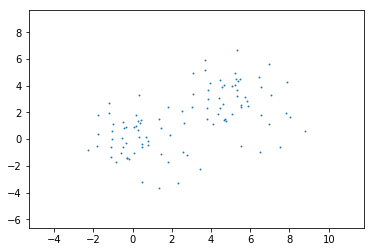

In [3]:
print('visualising the data points')
Vis_points(X)

train the Gaussian model, and visualise the points


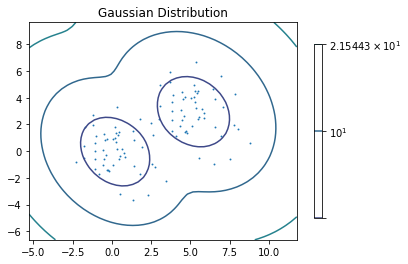

In [4]:
print('train the Gaussian model, and visualise the points')
clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
clf.fit(X)
Vis_Gaussian(X)

In [5]:
print('using the trained GMM to generate new data samples')
n_generated = 10000
print('number of generated samples:', n_generated)
X_generated = clf.sample(n_generated)[0]

using the trained GMM to generate new data samples
number of generated samples: 10000


visualising the generated data points


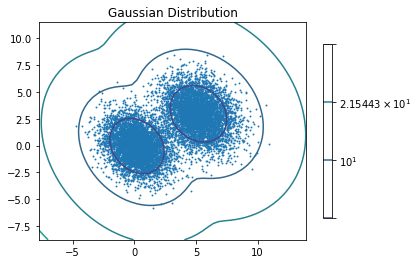

In [6]:
print('visualising the generated data points')
Vis_Gaussian(X_generated)